In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bmi-dataset/bmi.csv
/kaggle/input/boston-house-prices/housing.csv


In [2]:
df = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv')
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


<h1 style="color:#19e6e6;font-size:50px;font-family:Georgia;text-align:center;"><strong>🌟Table <strong style="color:black;font-size:45px;font-family:Georgia;">Of <strong style="color:#19e6e6;font-size:50px;font-family:Georgia;">The <strong style="color:black;font-size:45px;font-family:Georgia;">Contents <strong style="color:#19e6e6;font-size:50px;font-family:Georgia;">:-</strong></strong></strong></strong></strong></h1>
<p style="font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#19e6e6;">
    <br>
    <strong>1. Introduction</strong><br>
    &nbsp;&nbsp;1.1 Consequences of multicollinearity<br>
    &nbsp;&nbsp;1.2 Remedies to multicollinearity problem<br>
    <br>
    <strong>2. Set-up</strong><br>
    &nbsp;&nbsp;2.1 Import Libraries<br>
    &nbsp;&nbsp;2.2 Data Set Characteristics<br>
    &nbsp;&nbsp;2.3 Import Data<br>
    <br>
    <strong>3. The correlation matrix</strong><br>
    &nbsp;&nbsp;3.1 Clustermap<br>
    <br>
    <strong>4. Variance inflation factor</strong><br>
    &nbsp;&nbsp;4.1 Two kinds of multicollinearity<br>
    &nbsp;&nbsp;4.2 Data-based multicollinearity<br>
    &nbsp;&nbsp;4.3 Structural multicollinearity<br>
    <br>
    <strong>5. Feature reduction based on VIF</strong><br>
    <br>
    <strong>6. Regression Models performance comparison</strong><br>
    &nbsp;&nbsp;6.1 Some data pre-processing<br>
    &nbsp;&nbsp;6.2 Regression Evaluation Metrics<br>
    <br>
    <strong>7. Linear Regression</strong><br>
    <strong>8. Random Forest</strong><br>
    <strong>9. Linear Regression after dropping features using VIF</strong><br>
    <strong>10. Random Forest model after dropping features using VIF</strong><br>
    <strong>11. Recursive Feature Elimination (RFE)</strong><br>
    <br>
    <strong>12. Regularized Linear Models</strong><br>
    &nbsp;&nbsp;12.1 Regularization<br>
    &nbsp;&nbsp;12.2 Ridge Regression<br>
    &nbsp;&nbsp;12.3 Lasso Regression<br>
    &nbsp;&nbsp;12.4 Bayesian Ridge Regression<br>
    <br>
    <strong>13. Model Evaluation</strong><br>
    &nbsp;&nbsp;13.1 Creating new dataframe<br>
    &nbsp;&nbsp;13.2 Visualizing Model Performance<br>
    <br>
    <strong>14. Bonus: Hyperparameter Tuning Using GridSearchCV</strong><br>
    &nbsp;&nbsp;14.1 Tuned Ridge Regression<br>
    &nbsp;&nbsp;14.2 Visualizing Model Performance<br>
    <br>
    <strong>15. Other notebooks</strong><br>
    <strong>16. Some referrals</strong><br>
    <br>
</p>
ion
    
<br></p>

 # 1. Introduction

Collinearity (and Multicollinearity) means that the predictors variables, also known as independent variables, aren’t so independent.

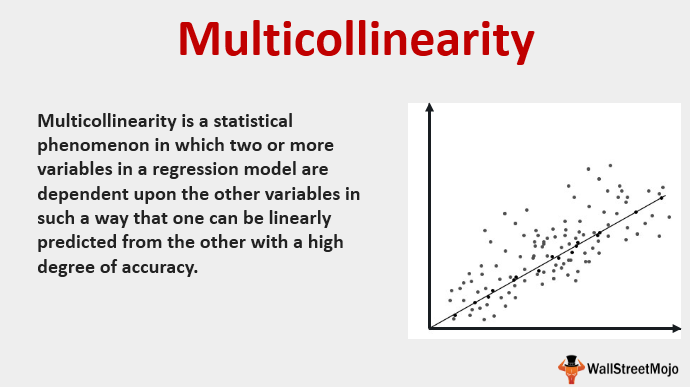
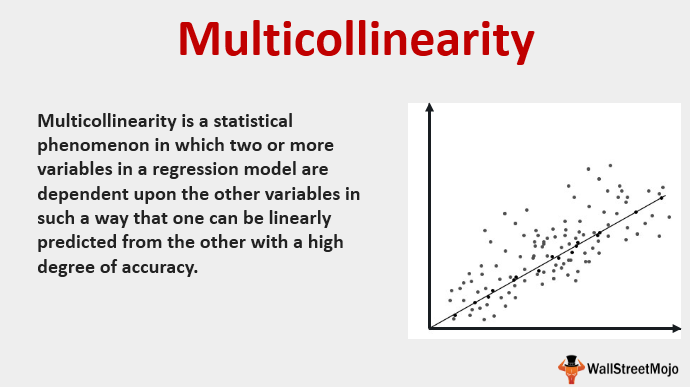

Collinearity is a situation where two features are linearly associated (high correlated), and they are used as predictors for the target. It’s often measured using Pearson’s correlation coefficient. Collinearity between more than two predictors is also possible (and often the case).

The term multicollinearity was first used by Ragnar Frisch. Multicollinearity is a special case of collinearity where a feature exhibits a linear relationship with two or more features. We can also have a situation where more than two features are correlated and, at the same time, have no high correlation pairwise.

Partial multicollinearity is ubiquitous in multiple regression. Two random variables will almost always correlate at some level in a sample, even if they share no fundamental relationship in the larger population. In other words, multicollinearity is a matter of degree.
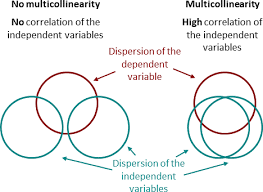
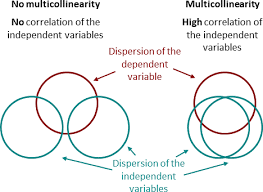

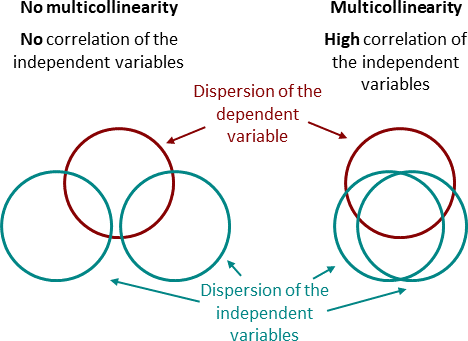
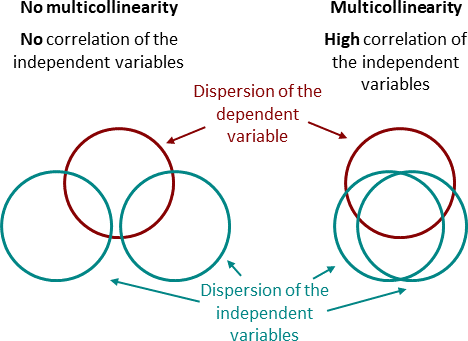

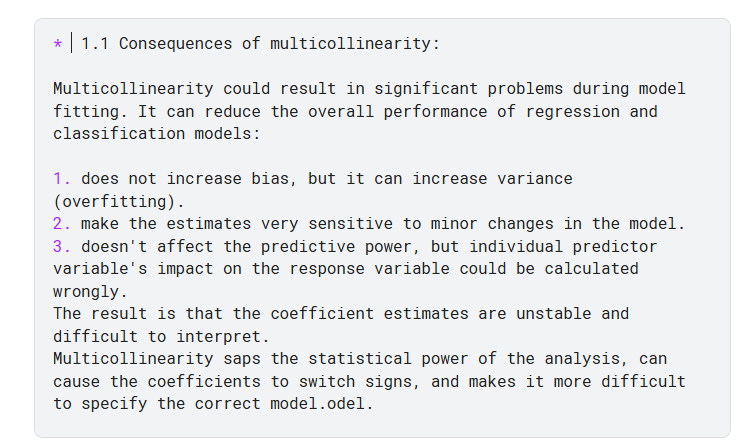

# 1.2 Remedies to multicollinearity problem
Increase the sample size. Enlarging the sample will introduce more variation in the data series, which reduces the effect of sampling error and helps increase precision when estimating various properties of the data. Increased sample sizes can reduce either the presence or the impact of multicollinearity, or both.

Remove some of the highly correlated features.

Manual Method - Variance Inflation Factor (VIF)
Automatic Method - Recursive Feature Elimination (RFE)
Feature Elmination using PCA Decomposition (I'll skip it in this study)
Replace highly correlated regressors with a linear combination of them.

Keep the common sense regarding feature engineering - understand what you are doing.

Use regularization methods such as RIDGE and LASSO or Bayesian regression.

# 2. Set-up

#### 2.1 Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

%matplotlib inline

## 2.2 Data Set Characteristics

### Boston House Prices

https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

  - CRIM     per capita crime rate by town
  - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
  - INDUS    proportion of non-retail business acres per town
  - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  - NOX      nitric oxides concentration (parts per 10 million)
  - RM       average number of rooms per dwelling
  - AGE      proportion of owner-occupied units built prior to 1940
  - DIS      weighted distances to five Boston employment centres
  - RAD      index of accessibility to radial highways
  - TAX      full-value property-tax rate per 10 000 USD
  - PTRATIO  pupil-teacher ratio by town
  - B        1000 (Bk - 0.63)^2 where Bk is the proportion of black people by town
  - LSTAT    % lower status of the population
  - MEDV     Median value of owner-occupied homes in $1000's

Missing Attribute Values: None

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

### BMI Dataset

https://www.kaggle.com/datasets/yasserh/bmidataset

This data frame contains the following columns:

Gender : Male / Female

Height : Number (cm)

Weight : Number (Kg)

Index:

0 - Extremely Weak

1 - Weak

2 - Normal

3 - Overweight

4 - Obesity

5 - Extreme Obesity


## 2.3 Import Data

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_boston = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv', header = None, delimiter = r"\s+", names = column_names)

raw_bmi = pd.read_csv('/kaggle/input/bmi-dataset/bmi.csv')

In [5]:
# Creating dummies for gender
raw_bmi['Gender'] = raw_bmi['Gender'].map({'Male':0, 'Female':1})

# 3. The correlation matrix

The correlation matrix gives you the pairwise correlation or bivariate relationship between two independent variables - **collinearity**. It is a table which displays the correlation coefficients for different variables. It takes an input relation with numerical columns, and calculates Pearson Correlation Coefficient between each pair of its input columns. 

The matrix shows the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data. If the correlation matrix shows off elements with a high absolute value, we can talk about collinearity. At its extreme explanatory variables overlap completely.


<Axes: >

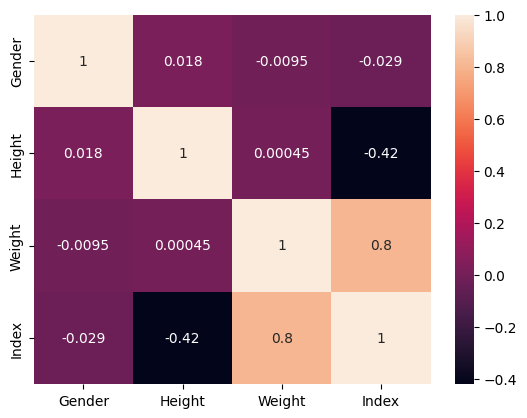

In [6]:
sns.heatmap(raw_bmi.corr(),annot=True)

We can see a strong correlation between 'Index' and 'Height' / 'Weight (as expected). We can also notice that 'Weight' has much more impact on INdex than 'Height. That shoud be also intuitive and expected.

<Axes: >

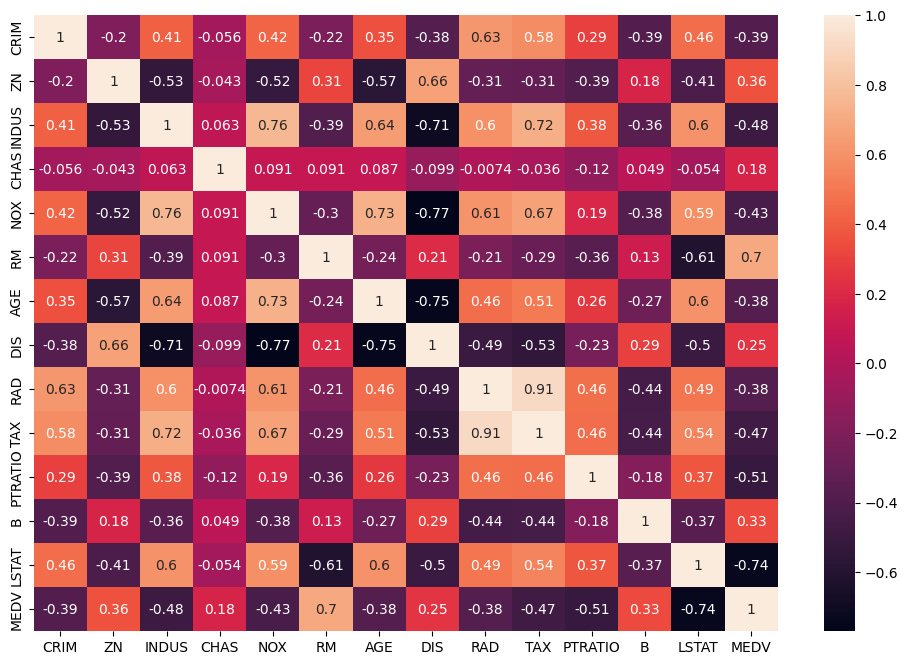

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(raw_boston.corr(), annot=True)

# 3.1 Clustermap
Clustermap table shows not only all correlation between variables, but also group (cluster) relationships.

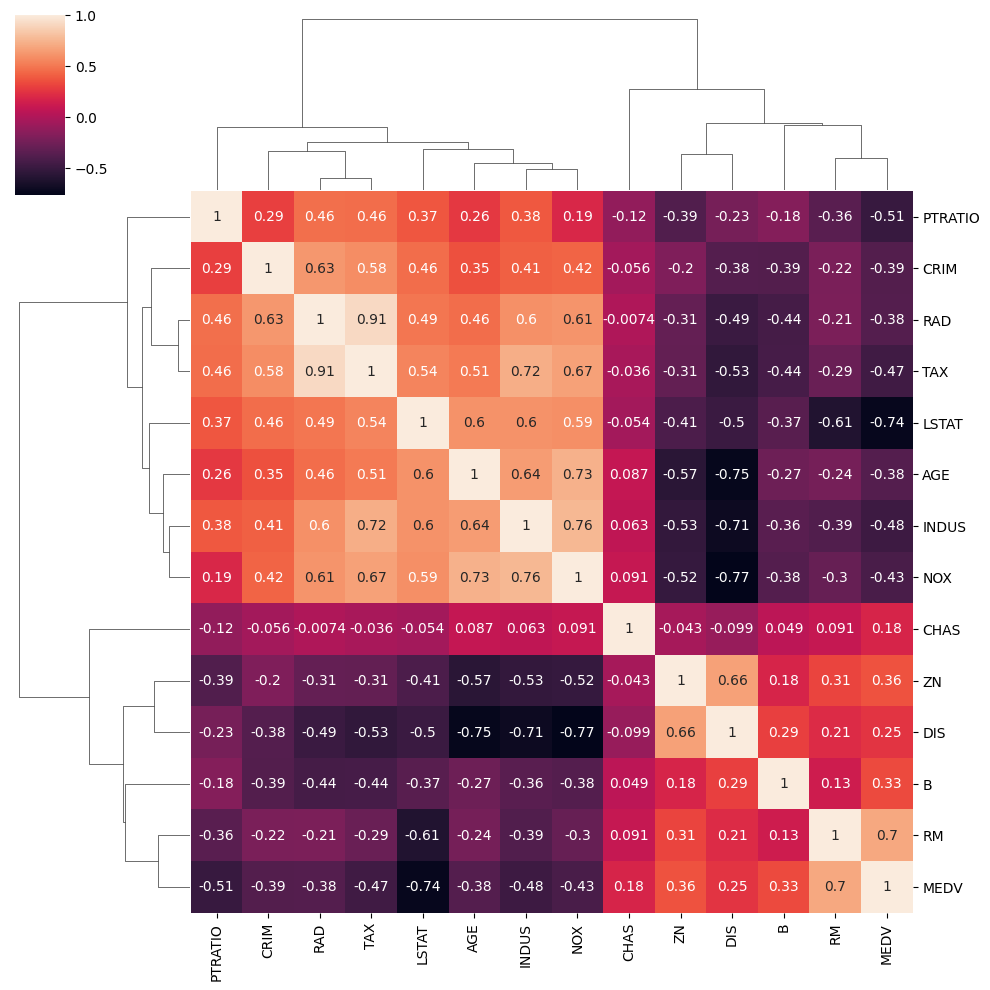

In [8]:
sns.clustermap(raw_boston.corr(), annot=True)

# 4. Variance inflation factor

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. VIF is used to identify the correlation of one independent variable with a group of other variables.

$$VIF_i  = \frac {1}{1-R_i^2}$$

In regression analysis, multicollinearity exists when two or more of the variables demonstrate a linear relationship between them. The VIF measures by how much the **linear correlation** of a given regressor with the other regressors increases the variance of its coefficient estimate with respect to the baseline case of no correlation. 

VIF tells us the factor by which the correlations amongst the predictors inflate the variance. For example, a VIF of 10 indicates that the existing multicollinearity is inflating the variance of the coefficients 10 times compared to a no multicollinearity model.

VIFs do not have any upper limit. The lower the value the better. Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

Therefore a VIF = 5 is often taken as a threshold. Which means that any independent variable greater than 5 will have to be removed. Although the ideal threshold value depends upon the case. In many econometric textbooks, you will find that multicollinearity is considered to be severe only when VIF >10

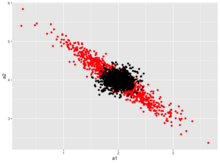
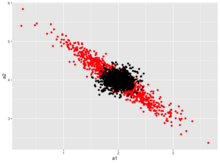

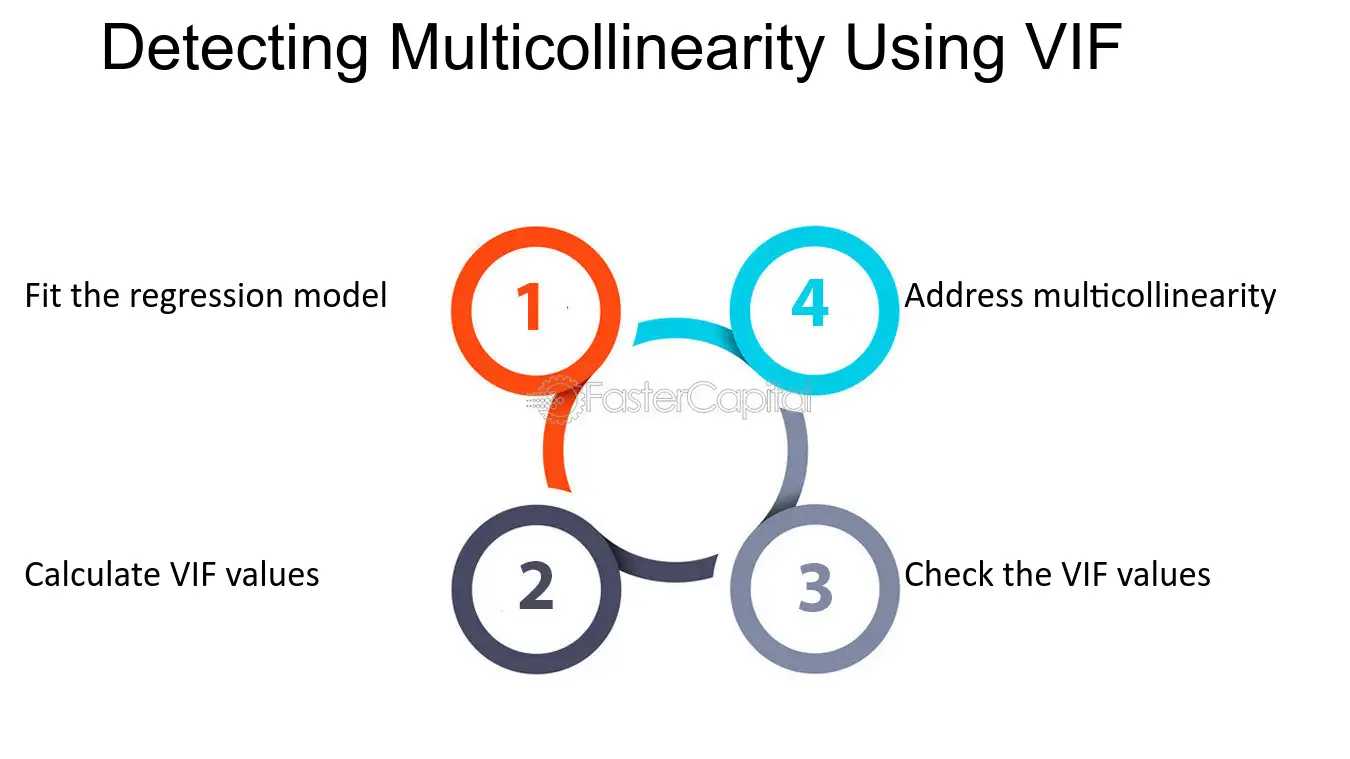
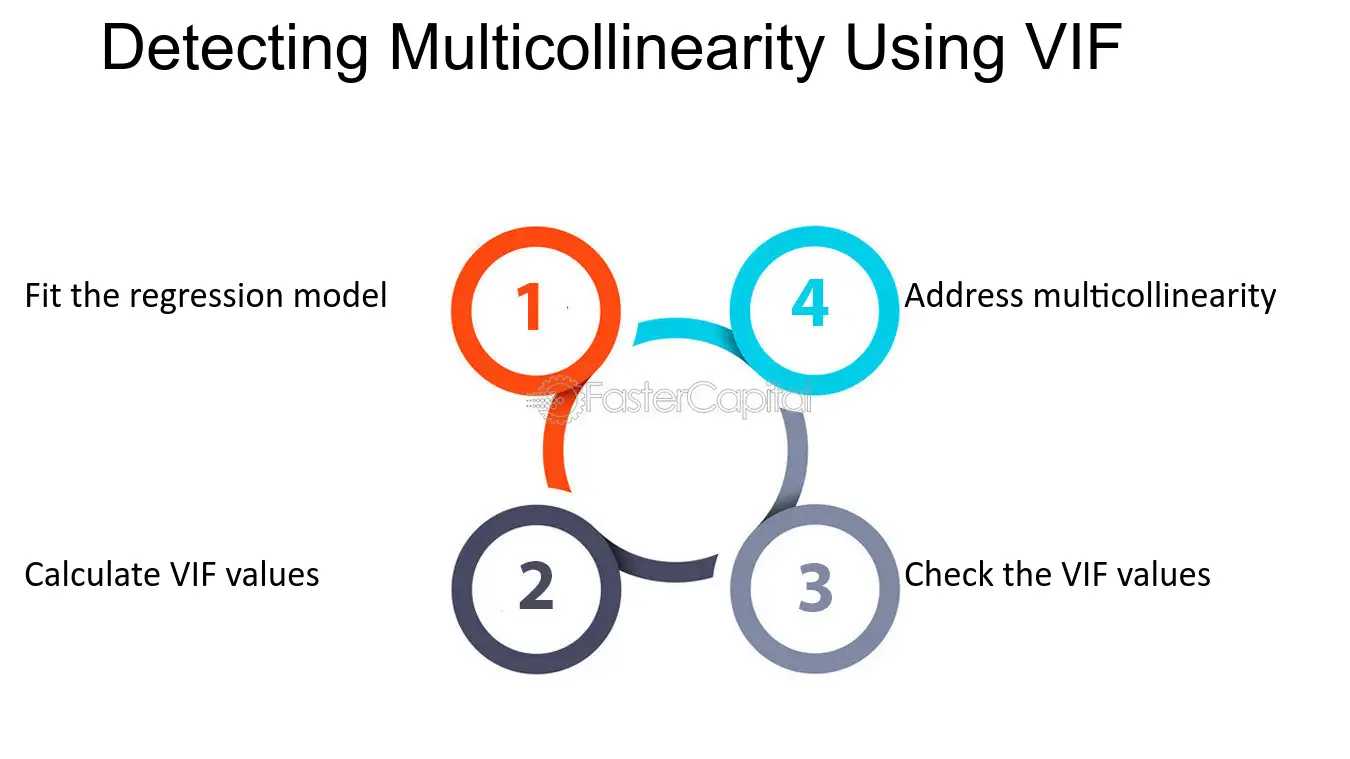

## 4.1 Two kinds of multicollinearity

1. **Data-based multicollinearity**: this type of multicollinearity is present in the data itself. Observational experiments are more likely to exhibit this kind of multicollinearity.

* Example: two identical (or almost identical) variables. Weight in pounds and weight in kilos, or investment income and savings/bond income.

2. **Structural multicollinearity**: caused by the researcher creating new predictor variables. This type occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify.

* Including a variable in the regression that is actually a combination of two other variables. For example, including “total investment income” when total investment income = income from stocks and bonds + income from savings interest.

## 4.2 Data-based multicollinearity

Let's check VIF for a BMI database using 3 features: 'Gender', 'Height' and 'Weight'.

In [9]:
raw_bmi

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3
...,...,...,...,...
495,1,150,153,5
496,1,184,121,4
497,1,141,136,5
498,0,150,95,5


In [10]:
iter_ = raw_bmi.shape[1]-1

In [11]:
vif = []
for i in range(iter_):
    vif.append(variance_inflation_factor(raw_bmi.iloc[:,:3],i))

In [12]:
vif

[2.028863924109992, 11.623103405710768, 10.688377415326789]

In [13]:
res = pd.DataFrame({'vif':vif, 'cols':raw_bmi.iloc[:,:3].columns})

In [14]:
res

,vif,cols
0,2.028864,Gender
1,11.623103,Height
2,10.688377,Weight


'Height' and 'Weight' have high values of VIF, indicating that these two variables are highly correlated. This is expected as the height of a person does influence their weight. Hence, considering these two features together still leads to a model with high multicollinearity.

In [15]:
import statsmodels.api as sm

In [16]:
raw_bmi

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3
...,...,...,...,...
495,1,150,153,5
496,1,184,121,4
497,1,141,136,5
498,0,150,95,5


In [17]:
# X = raw_bmi.drop()

# 4.3 Structural multicollinearity

Now let's check VIF for a BMI Database using 4 features : 'Gender', 'Height', 'Weight' and 'Index'.

In [18]:
X = raw_bmi
X

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3
...,...,...,...,...
495,1,150,153,5
496,1,184,121,4
497,1,141,136,5
498,0,150,95,5


In [20]:
vif = []
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X.iloc[:,:],i))


res = pd.DataFrame({'vif':vif,'Feature':X.columns})
res

,vif,Feature
0,2.031010,Gender
1,11.941301,Height
2,40.024880,Weight
3,25.143752,Index


There is a significant difference! The VIF for 'Weight' is > 40 and VIF for 'Index' is > 25!

I know that 'Index' was available in a data set, but think for a moment what 'Index' really stand for. We can treat it as a derivative of other features. It's very common to create such new fetures during feature engeenering.

Anyway - we can take this as a great example of multicolliniarity created by a researcher.

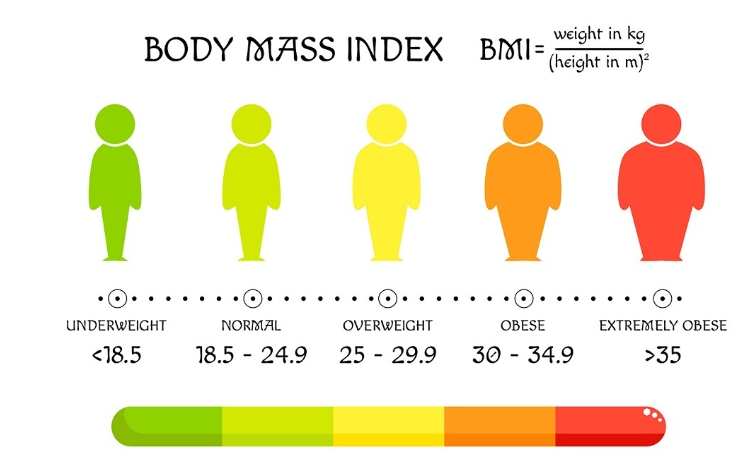

In [21]:
raw_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [23]:
X = raw_boston.drop('MEDV', axis=1)
y = raw_boston['MEDV']

In [26]:
vif_boston = []
for i in range(X.shape[1]):
    vif_boston.append(variance_inflation_factor(X.iloc[:,:X.shape[1]],i))

res_ = pd.DataFrame({'vif':vif_boston,'Features':X.columns})
res_

,vif,Features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


We have a huge VIF values here! Let's drop some highly correlated features in the next steps.

Important notice: we should do that step by step, by dropping features one by one and checking results.

In [27]:
# Let's drop one with high vif
# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

   Feature        VIF
0     CRIM   2.099345
1       ZN   2.451624
2    INDUS  14.275283
3     CHAS   1.142167
4      NOX  73.894171
5       RM  60.598846
6      AGE  21.361234
7      DIS  12.221605
8      RAD  15.159162
9      TAX  59.301541
10       B  18.614751
11   LSTAT  10.138324


VIF values have changed significantly after dropping just PTRATIO! But still we have high VIF values for other features.

Let's go further and drop more features until we have VIF values for all features under 10. I'lot show all steps here - you can check them.

The last step requires 7 features.

In [28]:
# Let's drop one with high vif
# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

   Feature        VIF
0     CRIM   2.097537
1       ZN   2.449661
2    INDUS  13.150904
3     CHAS   1.138277
4       RM  41.406746
5      AGE  19.889623
6      DIS  12.032952
7      RAD  15.155012
8      TAX  57.720347
9        B  18.396072
10   LSTAT   9.207840


In [29]:
# Let's drop one with high vif
# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD',  'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

  Feature        VIF
0    CRIM   2.097466
1      ZN   2.375219
2   INDUS   9.290080
3    CHAS   1.118613
4      RM  39.069063
5     AGE  19.780944
6     DIS  11.817803
7     RAD   4.965633
8       B  18.289917
9   LSTAT   9.046248


In [30]:
# Let's drop one with high vif
# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS',  'AGE', 'DIS', 'RAD', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

  Feature        VIF
0    CRIM   2.095367
1      ZN   2.334763
2   INDUS   9.016142
3    CHAS   1.116229
4     AGE  14.000758
5     DIS   8.447694
6     RAD   4.771767
7       B  13.537020
8   LSTAT   8.358925


In [31]:
# Let's drop one with high vif
# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

  Feature        VIF
0    CRIM   2.095211
1      ZN   2.313889
2   INDUS   8.205465
3    CHAS   1.106350
4     DIS   8.209371
5     RAD   4.689836
6       B  10.074224
7   LSTAT   6.856889


In [32]:
# Let's drop one with high vif
# the independent variables set
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD',  'LSTAT']]
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

  Feature       VIF
0    CRIM  2.067135
1      ZN  2.299351
2   INDUS  6.900077
3    CHAS  1.086574
4     DIS  3.968908
5     RAD  4.678181
6   LSTAT  6.726973


Now we have all features with VIF value < 10.

In the next steps we will compare linear regression model with all features against the one after using VIF for dropping features.

  # 6. Regression Models performance comparison

> # 6.1 Some data preprocessing

In [35]:
scaled_boston = raw_boston.copy()
scaled_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [41]:
from sklearn.preprocessing import StandardScaler

col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features = scaled_boston[col_names]

scaler  = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_boston[col_names] = features

In [42]:
X = scaled_boston.iloc[:, :-1].values
y = scaled_boston.iloc[:, -1].values

## 6. 2 Regression Evaluation Metrics


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:


$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** the average error. The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

- **MSE** because MSE "punishes" larger errors, which tends to be useful in the real world. Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

- **RMSE** is interpretable in the "y" units. Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

All of these are **loss functions**, because we want to minimize them.

- **R-squared** The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. When R² is high, it represents that the regression can capture much of variation in observed dependent variables. That’s why we can say the regression model performs well when R² is high.

It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one. One misconception about regression analysis is that a low R-squared value is always a bad thing. For example, some data sets or fields of study have an inherently greater amount of unexplained variation. In this case, R-squared values are naturally going to be lower. Investigators can make useful conclusions about the data even with a low R-squared value.

$$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$$

- **Adjusted R squared** is a modified version of R square, and it is adjusted for the number of independent variables in the model, and it will always be less than or equal to R².In the formula below n is the number of observations in the data and k is the number of the independent variables in the data.

### Conclusion

Both RMSE and R-Squared quantifies how well a linear regression model fits a dataset. When assessing how well a model fits a dataset, it’s useful to calculate both the RMSE and the R2 value because each metric tells us something different.

* RMSE tells us the typical distance between the predicted value made by the regression model and the actual value.

* R2 tells us how well the predictor variables can explain the variation in the response variable.

Adding more independent variables or predictors to a regression model tends to increase the R2 value, which tempts makers of the model to add even more variables. Adjusted R2 is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables. It is always lower than the R2.

The last metric we will use is **cross-validated R2**.
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

Cross-validation is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

# 7. Linear Regression

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm.predict(X_test)

In [45]:
# Predicting Cross Validation Score
cv_lm = cross_val_score(estimator = lm, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = lm.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
lm_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm_R2 = lm.score(X_test, y_test)
lmCV_R2 = cv_lm.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lm.score(X_test, y_test),4) )
print('Adjusted R2:', round(lm_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_lm.mean(),4) )

RMSE: 4.6387
R2: 0.7112
Adjusted R2: 0.684
Cross Validated R2:  0.6875


Text(0.5, 1.0, 'Linear regression with all features')

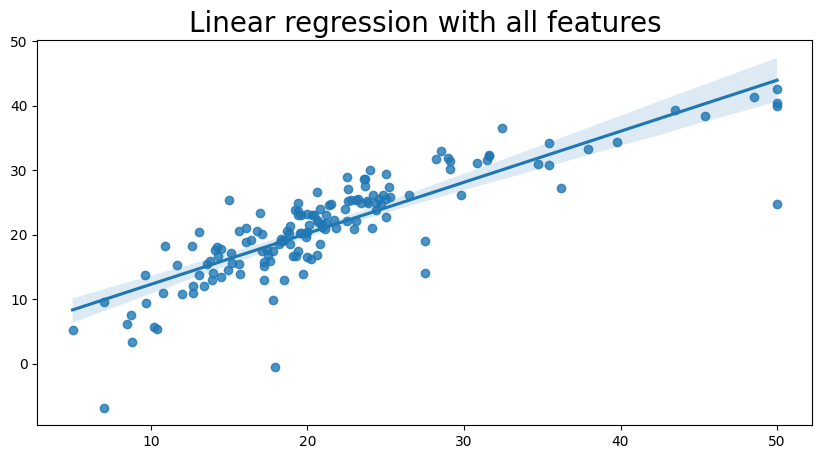

In [46]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression with all features', fontsize = 20)

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
RandomForest_reg.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = RandomForest_reg.predict(X_test)

In [49]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = RandomForest_reg, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = RandomForest_reg.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
rf_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rf_R2 = RandomForest_reg.score(X_test, y_test)
rfCV_R2 = cv_rf.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( RandomForest_reg.score(X_test, y_test),4) )
print('Adjusted R2:', round(rf_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_rf.mean(),4) )

RMSE: 3.3291
R2: 0.8513
Adjusted R2: 0.8373
Cross Validated R2:  0.8171


Results from Random Forest model looks much better!



# 9. Linear Regressin after droping features using VIF

Text(0.5, 1.0, 'Linear regression after dropping features')

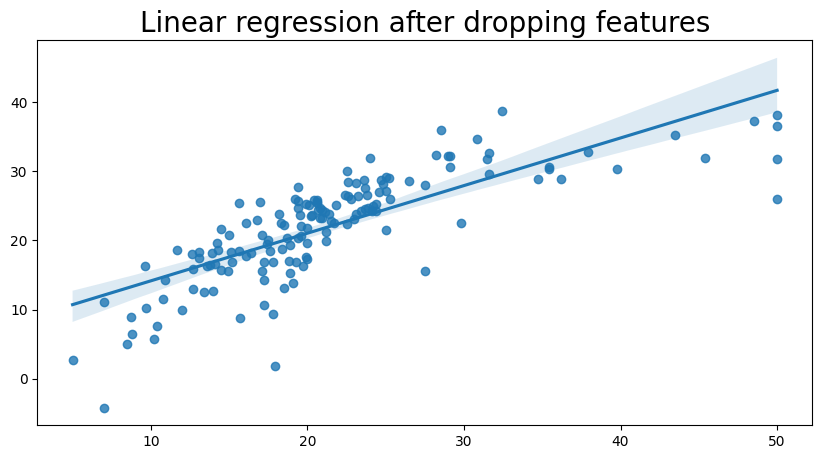

In [50]:
scaled_boston2 = scaled_boston.copy()
scaled_boston2 = scaled_boston2.drop(['NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B'], axis=1)
X = scaled_boston2.iloc[:, :-1].values
y = scaled_boston2.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm2.predict(X_test)
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression after dropping features', fontsize = 20)


In [51]:
# Predicting Cross Validation Score
cv_lm2 = cross_val_score(estimator = lm2, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = lm2.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
lm2_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lm2_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lm2_R2 = lm2.score(X_test, y_test)
lm2CV_R2 = cv_lm2.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lm2.score(X_test, y_test),4) )
print('Adjusted R2:', round(lm2_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_lm2.mean(),4) )

RMSE: 5.4573
R2: 0.6003
Adjusted R2: 0.5809
Cross Validated R2:  0.606


As we can see - the results doesn't look better!

We will talk about that later.

# 10. Random Forest model after droping features using VIF

In [53]:
# Creating and training model
RandomForest2_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
RandomForest2_reg.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = RandomForest2_reg.predict(X_test)


In [54]:
# Predicting Cross Validation Score
cv_rf2 = cross_val_score(estimator = RandomForest2_reg, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = RandomForest2_reg.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
rf2_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rf2_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rf2_R2 = RandomForest2_reg.score(X_test, y_test)
rf2CV_R2 = cv_rf2.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( RandomForest2_reg.score(X_test, y_test),4) )
print('Adjusted R2:', round(rf2_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_rf2.mean(),4) )

RMSE: 4.4068
R2: 0.7394
Adjusted R2: 0.7267
Cross Validated R2:  0.7554


Once again. After dropping features we have worse results than before.



# 11. Recursive Feature Elimination (RFE)


Recursive Feature Elimination (RFE) is a backward feature selection algorithm.

The algorithn eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features, determined by either the coef_ or feature_importances_ attribute of the fitted model.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features.

Not all models can be paired with the RFE method, and some models benefit more from RFE than others. Because RFE requires that the initial model uses the full predictor set, then some models cannot be used when the number of predictors exceeds the number of samples. These models include multiple linear regression, logistic regression, and linear discriminant analysis. If we desire to use one of these techniques with RFE, then the predictors must first be winnowed down. In addition, some models benefit more from the use of RFE than others. Random forest is one such model (Svetnik et al. 2003).

Backwards selection is frequently used with random forest models for two reasons: 
* random forest tends not to exclude variables from the prediction equation;
* it has an internal method for measuring feature importance.

In [55]:
X = scaled_boston.iloc[:, :-1].values
y = scaled_boston.iloc[:, -1].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=8)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
rf_pipeline.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = rf_pipeline.predict(X_test)

In [57]:
# Predicting Cross Validation Score
cv_rf_pipeline = cross_val_score(estimator = rf_pipeline, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = rf_pipeline.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
rf_pipeline_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rf_pipeline_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rf_pipeline_R2 = rf_pipeline.score(X_test, y_test)
rf_pipelineCV_R2 = cv_rf_pipeline.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( rf_pipeline.score(X_test, y_test),4) )
print('Adjusted R2:', round(rf_pipeline_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_rf_pipeline.mean(),4) )

RMSE: 3.2991
R2: 0.8539
Adjusted R2: 0.8402
Cross Validated R2:  0.8196


It look like the Random Forest model using RFE is better!



# 12. Regularized Linear Models

> ## 12.1 Regularization

When it comes to training models, there are two major problems one can encounter: overfitting and underfitting.

* Overfitting: when the model performs well on the training set but not on test data.
* Underfitting: when it neither performs well on the train set nor on the test set.

Particularly, regularization is implemented to avoid overfitting of the data, especially when there is a large variance between train and test set performances. With regularization, the number of features used in training is kept constant, yet the magnitude of the coefficients (w) as seen in equation 1.1, is reduced.

> ## 12.2 Ridge Regression

Ridge Regression is an extension of linear regression that adds a regularization L2 penalty to the loss function during training. Ridge regression is used when there are multiple variables that are highly correlated. It helps to prevent overfitting by penalizing the coefficients of the variables. Ridge regression reduces the overfitting by adding a penalty term to the error function that shrinks the size of the coefficients.

Advantages of ridge regression:

* is more robust to collinearity than least-squares/linear regression;
* less sensitive to outliers than linear regression (but still sensitive);
* does not require the data to be perfectly normalized;
* can be applied even when the number of variables is greater than the number of observations.

Disadvantages of ridge regression:

* it can be computationally intensive;
* can require more data to achieve accurate results;
* results can be difficult to interpret because the Ridge term or L2 norm modifies the coefficients;
* it is sensitive to outliers and can produce unstable results if the data contains outliers.

In [58]:
X = scaled_boston.iloc[:, :-1].values
y = scaled_boston.iloc[:, -1].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [60]:
from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = ridge_reg.predict(X_test)

In [61]:
# Predicting Cross Validation Score
cv_ridge = cross_val_score(estimator = ridge_reg, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = ridge_reg.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
ridge_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
ridge_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
ridge_R2 = ridge_reg.score(X_test, y_test)
ridgeCV_R2 = cv_ridge.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( ridge_reg.score(X_test, y_test),4) )
print('Adjusted R2:', round(ridge_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_ridge.mean(),4) )

RMSE: 4.6403
R2: 0.711
Adjusted R2: 0.6838
Cross Validated R2:  0.6882


Text(0.5, 1.0, 'Ridge Regression model')

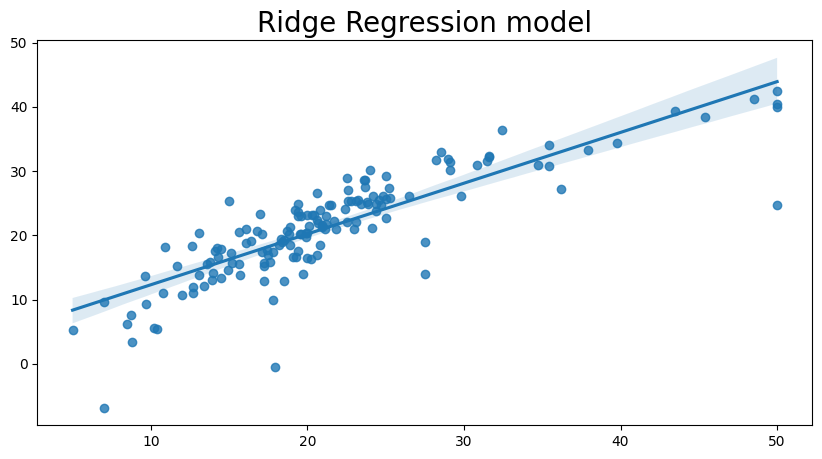

In [62]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Ridge Regression model', fontsize = 20)

> ## 12.3 Lasso Regression

Lasso Regression is a popular type of regularized linear regression that includes an L1 penalty. Lasso is short for Least Absolute Shrinkage and Selection Operator. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

An L1 penalty minimizes the size of all coefficients and allows any coefficient to go to the value of zero, effectively removing input features from the model.

LASSO isn’t a type of regression, it’s a method of model building and variable selection that can be applied to many types of regression, including ordinary least squares, logistic regression, and so on.

Advantages of LASSO:
* Automatic features selection
* Reduced overfitting

Luckily, because of LASSO’s built-in variable selection, it can handle some multicollinearity without sacrificing interpretability. If the collinearity is too high, however, LASSO’s variable selection performance will start to suffer. Ridge is better for that case.

Disadvantages of LASSO:
* Coefficients that are produced by a LASSO model are biased. The L1 penalty that is added to the model artificially shrinks the coefficients closer to zero, or in some cases, all the way to zero. That means that the coefficients from a LASSO model do not represent the true magnitude of the relationship between the features and and the outcome, but rather a shrunken version of that magnitude.
* Difficult to estimate standard errors. Since the coefficient estimates in a LASSO model are biased, it is difficult to estimate accurate standard errors for them. This makes it difficult to do things like run statistical tests on them and build confidence intervals around them.
* Struggle with correlated features. What usually happens is that one of the features gets selected somewhat arbitrarily and all of the other features that are highly correlated with that feature get effectively dropped from the model. This may lead someone to erroneously conclude that only the feature that was selected to remain in the model is important, when in reality some of the other features may be just as important or even more important.
* Unstable estimates. The estimates produced by LASSO models are known to be relatively unstable, which means that they can change a lot when trained on slightly different datasets.
* Introduction of a hyperparameter.

In [63]:
from sklearn.linear_model import Lasso

# Creating and training model
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lasso_reg.predict(X_test)

In [64]:
# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_reg, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = lasso_reg.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
lasso_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lasso_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
lasso_R2 = lasso_reg.score(X_test, y_test)
lassoCV_R2 = cv_lasso.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( lasso_reg.score(X_test, y_test),4) )
print('Adjusted R2:', round( lasso_adjusted_r2,4) )
print("Cross Validated R2:", round( cv_lasso.mean(),4) )

RMSE: 4.877
R2: 0.6808
Adjusted R2: 0.6507
Cross Validated R2: 0.674


Text(0.5, 1.0, 'Lasso Regression model')

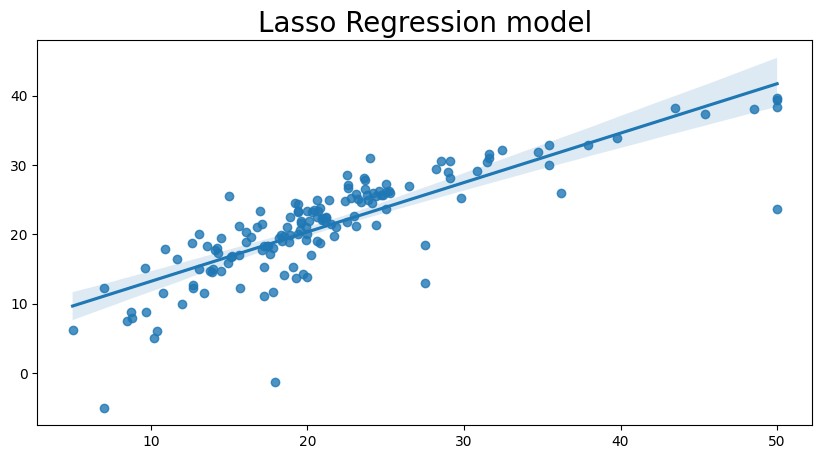

In [65]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Lasso Regression model', fontsize = 20)

> ## 12.4 Bayesian Ridge Regression

Bayesian is an approach to defining and estimating statistical models. It can be used with any Regression technique like Linear Regression, Lasso Regression, etc. Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates. The output or response 'y' is assumed to drawn from a probability distribution rather than estimated as a single value.

Bayesian Regression can be very useful when we have insufficient data in the dataset or the data is poorly distributed.

**Advantages of Bayesian Regression**: 

* Very effective when the size of the dataset is small.
* Well-suited for on-line based learning (data is received in real-time), as compared to batch based learning, where we have the entire dataset on our hands before we start training the model. This is because Bayesian Regression doesn’t need to store data.
* The Bayesian try and test approach and is very robust mathematically.

**Disadvantages of Bayesian Regression**:  

* The inference of the model can be time-consuming.
* If there is a large amount of data available for our dataset, the Bayesian approach is not worth it and the regular frequentist approach does a more efficient job

In [66]:
from sklearn.linear_model import BayesianRidge

# Creating and training model
BayesianRidge_reg = BayesianRidge()
BayesianRidge_reg.fit(X_train, y_train)
   
# Model making a prediction on test data
y_pred = BayesianRidge_reg.predict(X_test)

In [67]:
# Predicting Cross Validation Score
cv_BayesianRidge = cross_val_score(estimator = BayesianRidge_reg, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = BayesianRidge_reg.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
BayesianRidge_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
BayesianRidge_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
BayesianRidge_R2 = BayesianRidge_reg.score(X_test, y_test)
BayesianRidgeCV_R2 = cv_BayesianRidge.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),6) )
print('R2:', round( BayesianRidge_reg.score(X_test, y_test),6) )
print('Adjusted R2:', round( BayesianRidge_adjusted_r2,6) )
print("Cross Validated R2:", round( cv_BayesianRidge.mean(),6) )

RMSE: 4.64904
R2: 0.709936
Adjusted R2: 0.682611
Cross Validated R2: 0.689958


Text(0.5, 1.0, 'Bayesian Ridge Regression model')

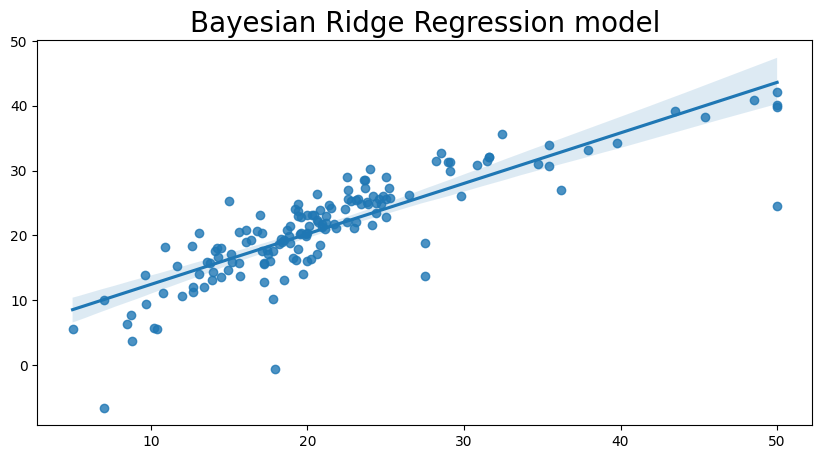

In [68]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Bayesian Ridge Regression model', fontsize = 20)

# 13. Model Evaluation

> ## 13.1 Creating new dataframe

In [69]:
models = [('Linear Regression', lm_RMSE, lm_R2, lm_adjusted_r2, lmCV_R2),
          ('Random Forest Regressor', rf_RMSE, rf_R2, rf_adjusted_r2, rfCV_R2),
          ('Linear Regression VIF', lm2_RMSE, lm2_R2, lm2_adjusted_r2, lm2CV_R2),
          ('Random Forest Regressor VIF', rf2_RMSE, rf2_R2, rf2_adjusted_r2, rf2CV_R2),
          ('Random Forest Regressor RFE', rf_pipeline_RMSE, rf_pipeline_R2, rf_pipeline_adjusted_r2, rf_pipelineCV_R2),
          ('Ridge Regression', lasso_RMSE, lasso_R2, lasso_adjusted_r2, lassoCV_R2),
          ('Lasso Regression', ridge_RMSE, ridge_R2, ridge_adjusted_r2, ridgeCV_R2),
          ('Bayesian Ridge Regression', BayesianRidge_RMSE, BayesianRidge_R2, BayesianRidge_adjusted_r2, BayesianRidgeCV_R2),   
         ]

In [70]:
predictions = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2 Score', 'Adjusted R2 Score', 'Cross Validated R2 Score'])
predictions

,Model,RMSE,R2 Score,Adjusted R2 Score,Cross Validated R2 Score
0,Linear Regression,4.638690,0.711226,0.684023,0.687535
1,Random Forest Regressor,3.329100,0.851262,0.837251,0.817071
2,Linear Regression VIF,5.457282,0.600313,0.580884,0.606042
3,Random Forest Regressor VIF,4.406752,0.739382,0.726713,0.755377
4,Random Forest Regressor RFE,3.299102,0.853931,0.840171,0.819627
5,Ridge Regression,4.876996,0.680793,0.650723,0.673983
6,Lasso Regression,4.640288,0.711027,0.683805,0.688212
7,Bayesian Ridge Regression,4.649040,0.709936,0.682611,0.689958


The results could be little surprising. 
* It looks like that simple feature deletion using VIF method led to worse outcome! 
* Even some more robust models didn't perform better than the most simple Linear Regression.

What are the conclusions?
- VIF is not as simple as we could expect.
- "Better" models are not always better.
- Probably we should work much more for better results (e.g. with parameter tuning)

> ## 13.2 Visualizing Model Performance

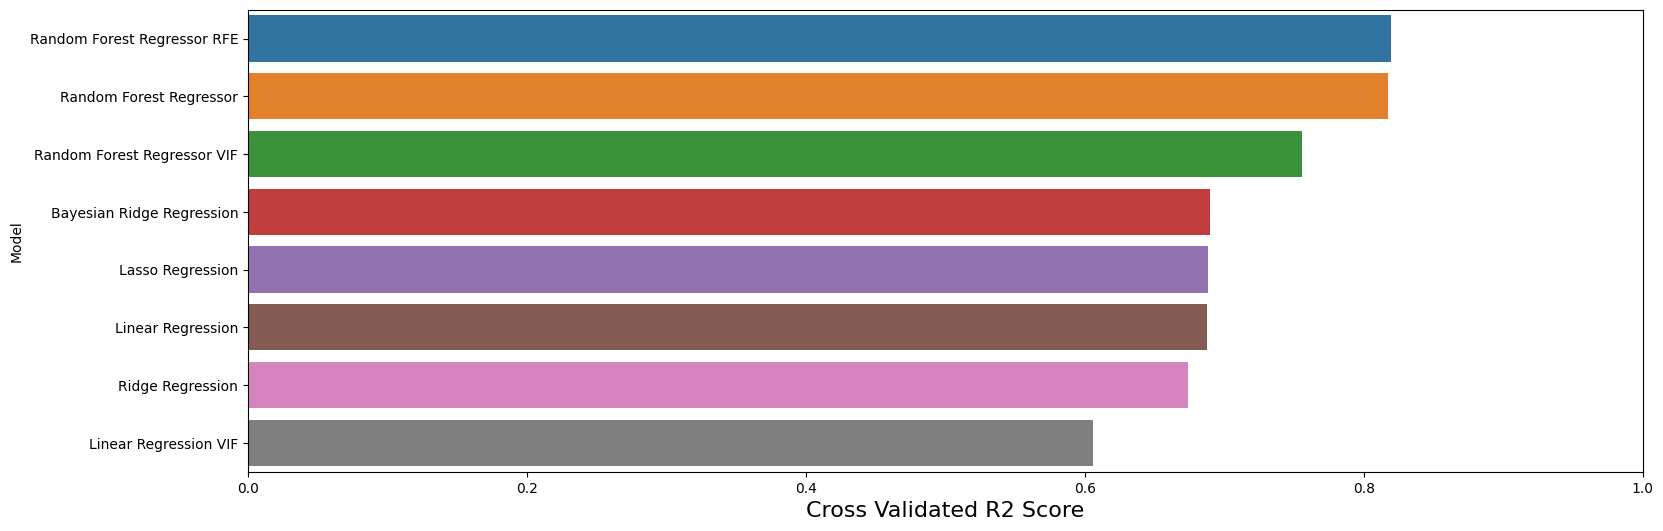

In [71]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predictions.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = predictions, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

# 14. Bonus: hyperparameters Tuning Using GridSearchCV

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us. Machine learning algorithms never learn these parameters. These can be tuned in different step.

GridSearchCV is a technique for finding the optimal hyperparameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

The “best” parameters that GridSearchCV identifies are technically the best that could be produced, but only by the parameters that you included in your parameter grid.

> ## 14.1 Tuned Ridge Regression

In [72]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features are those features created by raising existing features to an exponent. 
# For example, if a dataset had one input feature X, 
# then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2.

steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test)

In [73]:
from sklearn.model_selection import GridSearchCV

alpha_params = [{'model__alpha': list(range(1, 15))}]

clf = GridSearchCV(ridge_pipe, alpha_params, cv = 10)

# Fit and tune model
clf.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = BayesianRidge_reg.predict(X_test)

# The combination of hyperparameters along with values that give the best performance of our estimate specified
print(clf.best_params_)

{'model__alpha': 12}


In [74]:
# Predicting Cross Validation Score
cv_Ridge3 = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)

# Calculating Adjusted R-squared
r2 = clf.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
Ridge3_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
Ridge3_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Ridge3_R2 = clf.score(X_test, y_test)
Ridge3CV_R2 = cv_Ridge3.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),6) )
print('R2:', round( clf.score(X_test, y_test),6) )
print('Adjusted R2:', round( Ridge3_adjusted_r2,6) )
print("Cross Validated R2:", round( cv_Ridge3.mean(),6) )

RMSE: 4.64904
R2: 0.827825
Adjusted R2: 0.811606
Cross Validated R2: 0.845011


## 14.2 Visualizing Model Performance

In [75]:
models2 = [('Tuned Ridge Regression', Ridge3_RMSE, Ridge3_R2, Ridge3_adjusted_r2, Ridge3CV_R2)]
predictions2 = pd.DataFrame(data = models2, columns=['Model', 'RMSE', 'R2 Score', 'Adjusted R2 Score', 'Cross Validated R2 Score'])
predictions2

,Model,RMSE,R2 Score,Adjusted R2 Score,Cross Validated R2 Score
0,Tuned Ridge Regression,4.64904,0.827825,0.811606,0.845011


In [76]:
result = pd.concat([predictions, predictions2], ignore_index=True, sort=False)
result

,Model,RMSE,R2 Score,Adjusted R2 Score,Cross Validated R2 Score
0,Random Forest Regressor RFE,3.299102,0.853931,0.840171,0.819627
1,Random Forest Regressor,3.329100,0.851262,0.837251,0.817071
2,Random Forest Regressor VIF,4.406752,0.739382,0.726713,0.755377
3,Bayesian Ridge Regression,4.649040,0.709936,0.682611,0.689958
4,Lasso Regression,4.640288,0.711027,0.683805,0.688212
5,Linear Regression,4.638690,0.711226,0.684023,0.687535
6,Ridge Regression,4.876996,0.680793,0.650723,0.673983
7,Linear Regression VIF,5.457282,0.600313,0.580884,0.606042
8,Tuned Ridge Regression,4.649040,0.827825,0.811606,0.845011


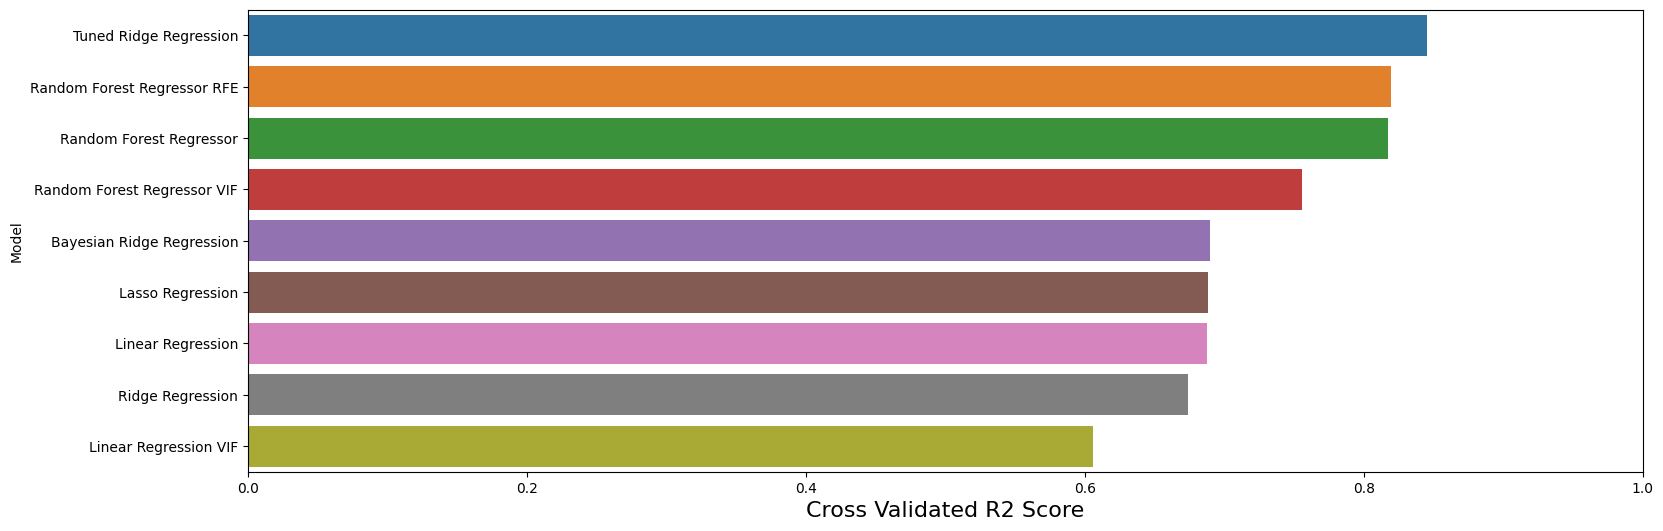

In [77]:
f, axe = plt.subplots(1,1, figsize=(18,6))

result.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = result, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

We can see that Tuned Ridge Regression outperformed even Random Forest Regressor RFE taking into account Cross Validated R2 score!

BUT - this is obviously not the end. We can tune other models ;) This is a never-ending story in machine learning and thhat is (obviously?) the exciting part ;)

# 16. Some referrals

https://www.yourdatateacher.com/2021/06/28/a-python-library-to-remove-collinearity/

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

https://www.sciencedirect.com/topics/mathematics/multicollinearity

https://www.statisticshowto.com/multicollinearity/

https://crunchingthedata.com/when-to-use-lasso/

https://www.geeksforgeeks.org/implementation-of-bayesian-regression/

https://bookdown.org/max/FES/recursive-feature-elimination.html

https://machinelearningmastery.com/rfe-feature-selection-in-python/

----------------------------------------------------------------------
👉 This notebook is inspired by @Marcin Rutecki

----------------------------------------------------------------------